In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import cv2

In [3]:
import numpy as np

In [4]:
dimg = cv2.imread('collect_04212021_18_02_56/depth1618999376.504177.png', -1)
dimg.shape

(480, 640)

In [5]:
print(cv2.IMREAD_UNCHANGED)

-1


In [6]:
cimg = cv2.imread('collect_04212021_18_02_56/color1618999376.504177.png', 1)
cimg.shape

(480, 640, 3)

In [11]:
cimg = cv2.imread('/home/liyunfan/Desktop/GraduationProject/liyunfan/collect_0428/color1619601178.6974974.png', 1)
cimg.shape

(480, 640, 3)

In [12]:
import mediapipe as mdp
mp_drawing = mdp.solutions.drawing_utils
mp_pose = mdp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

In [13]:
results = pose.process(cimg)
mp_drawing.draw_landmarks(cimg, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

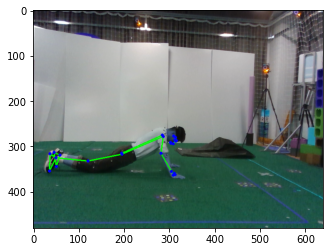

In [14]:
plt.imshow(cimg)
plt.show()

In [15]:
cv2.imwrite('/home/liyunfan/Desktop/GraduationProject/liyunfan/collect_0428/color1619601178.6974974.mediapipe.png',cimg)

True

z: Represents the landmark depth with the depth at the midpoint of hips being the origin, and the smaller the value the closer the landmark is to the camera. The magnitude of z uses
roughly the same scale as x.

In [45]:
xyzv = []
if results.pose_landmarks is not None:
    [xyzv.extend([lm.x*dimg.shape[0], lm.y*dimg.shape[1], lm.z, lm.visibility]) for lm in results.pose_landmarks.landmark]

In [48]:
LEFT_HIP = 23
RIGHT_HIP = 24
ORIGIN_CAM = dimg[int(xyzv[LEFT_HIP*4+1])][int(xyzv[LEFT_HIP*4+2])]+dimg[int(xyzv[RIGHT_HIP*4+1])][int(xyzv[RIGHT_HIP*4+2])]/2
ORIGIN_CAM

3202.5

In [55]:
for x,y,z,v in np.array(xyzv).reshape(-1,4):
    x,y=np.array([x,y],dtype=int)
    z_ = (dimg[x][y]-ORIGIN_CAM)#/dimg.shape[0]
    print(z_,(-z))

1286.5 0.3222641348838806
1567.5 0.2946443259716034
1567.5 0.294562429189682
1642.5 0.29456305503845215
1642.5 0.2978082299232483
1801.5 0.2976950407028198
1843.5 0.29787880182266235
1493.5 0.13656583428382874
1761.5 0.14833013713359833
1037.5 0.2652832567691803
1353.5 0.26903843879699707
1567.5 0.02676035836338997
1530.5 0.06150627136230469
1353.5 0.11241565644741058
1567.5 0.14188094437122345
1319.5 0.4727194905281067
1353.5 0.4148534834384918
1353.5 0.556462824344635
1387.5 0.48297205567359924
-3202.5 0.5781306624412537
1387.5 0.5026538372039795
-3202.5 0.492855966091156
1530.5 0.427903950214386
-476.5 -0.0074217664077878
-501.5 0.007075127214193344
2297.5 0.0038563665002584457
7897.5 -0.015892161056399345
-941.5 -0.23355884850025177
-779.5 -0.28423887491226196
-1037.5 -0.2467227727174759
-889.5 -0.2998771667480469
-1146.5 -0.07542179524898529
-1233.5 -0.12422380596399307


In [33]:
ORIGIN_CAM = d_hip_middle = (z_gt[23]+z_gt[24])/2
for x,y,z,v in xyzv:
    z_ = (dimg[x][y]-ORIGIN_CAM)*dimg.shape[0]
    print(int(-z*65535),z_gt)

SyntaxError: invalid syntax (<ipython-input-33-3b4881e00848>, line 5)